https://www.kaggle.com/c/ga-customer-revenue-prediction

In [1]:
import os # it's a operational system library, to set some informations
import random # random is to generate random values

In [2]:
import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values


In [5]:
import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots
import squarify # to better understand proportion of categorys - it's a treemap layout algorithm

In [ ]:
#  !pip install squarify
#  !pip install plotly

In [6]:
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

In [7]:
import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json fi

In [8]:
from os import path
from fastai.text import *

D:\python\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.

D:\python\envs\fastai\lib\importlib\_bootstrap.py:219: RuntimeWarning:

cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject

D:\python\envs\fastai\lib\importlib\_bootstrap.py:219: RuntimeWarning:

cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject



In [9]:
# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

In [10]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [11]:
PATH=Path('data/kg-google/')

In [12]:
p=0.07

In [13]:
def json_read(filename):
    df = pd.read_csv(PATH/filename,
                     converters={column: json.loads for column in columns},
                     dtype={'fullVisitorId': 'str'},
                     skiprows=lambda i : i> 0 and random.random() > p)
    
    for column in columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f'{column}.{subcolumn}' for subcolumn in  column_as_df.columns]
        df = df.drop(column,axis=1).merge(column_as_df,right_index=True,left_index=True)
        
#     print(f'Loaded {os,path.basename(data_frame)}. Shape: {df.shape}')
    return df    

In [14]:
df_train = json_read('train_v2.csv')

In [15]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,5983987899933814948,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",Not Socially Engaged,1508177658,1,1508177658,Safari,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,4222377767334415363,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",Not Socially Engaged,1508191824,1,1508191824,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,3553166538542146276,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508172807,1,1508172807,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Affiliates,[],20171016,1806667105964177644,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176571,1,1508176571,Chrome,...,NaN,NaN,NaN,NaN,Data Share Promo,NaN,NaN,affiliate,NaN,Partners
4,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,2383232086245645134,"[{'hitNumber': '1', 'time': '0', 'hour': '18',...",Not Socially Engaged,1508205399,1,1508205399,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [16]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    print("\n Total of Sales % of Total: ", round((df_train[df_train['totals.transactionRevenue'] != np.nan]['totals.transactionRevenue'].count() / len(df_train['totals.transactionRevenue']) * 100),4))
    return 

In [17]:
missing_values(df_train) 

Total columns at least one Values: 
                                               Total    Percent
totals.totalTransactionRevenue                118069  98.889401
totals.transactionRevenue                     118069  98.889401
totals.transactions                           118066  98.886888
trafficSource.adContent                       114859  96.200846
trafficSource.adwordsClickInfo.slot           114119  95.581054
trafficSource.adwordsClickInfo.page           114119  95.581054
trafficSource.adwordsClickInfo.isVideoAd      114119  95.581054
trafficSource.adwordsClickInfo.adNetworkType  114119  95.581054
trafficSource.adwordsClickInfo.gclId          114107  95.571004
trafficSource.isTrueDirect                     81902  68.597512
trafficSource.referralPath                     80036  67.034633
trafficSource.keyword                          73410  61.484987
totals.timeOnSite                              61033  51.118556
totals.sessionQualityDim                       58575  49.059843
tota

### Function to handle datetime

In [18]:
from datetime import datetime
def date_process(df):
    df["date"] = pd.to_datetime(df["date"],format="%Y%m%d")
    df["_weekday"] = df['date'].dt.weekday #extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting day
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    return df

In [19]:
df_train = date_process(df_train)
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,_weekday,_day,_month,_year,_visitHour
0,Organic Search,"[{'index': '4', 'value': 'North America'}]",2017-10-16,5983987899933814948,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",Not Socially Engaged,1508177658,1,1508177658,Safari,...,NaN,(not provided),organic,NaN,google,0,16,10,2017,14
1,Organic Search,"[{'index': '4', 'value': 'North America'}]",2017-10-16,4222377767334415363,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",Not Socially Engaged,1508191824,1,1508191824,Chrome,...,NaN,(not provided),organic,NaN,google,0,16,10,2017,18
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",2017-10-16,3553166538542146276,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508172807,1,1508172807,Chrome,...,NaN,(not provided),organic,NaN,google,0,16,10,2017,12
3,Affiliates,[],2017-10-16,1806667105964177644,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176571,1,1508176571,Chrome,...,NaN,NaN,affiliate,NaN,Partners,0,16,10,2017,13
4,Organic Search,"[{'index': '4', 'value': 'North America'}]",2017-10-16,2383232086245645134,"[{'hitNumber': '1', 'time': '0', 'hour': '18',...",Not Socially Engaged,1508205399,1,1508205399,Chrome,...,NaN,(not provided),organic,NaN,google,0,16,10,2017,21


In [20]:
def NumericalColumns(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0
    df['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['totals.pageviews'] = df['totals.pageviews'].astype(int) # setting numerical column as integer
    df['totals.newVisits'] = df['totals.newVisits'].astype(int) # setting numerical column as integer
    df['totals.bounces'] = df['totals.bounces'].astype(int)  # setting numerical column as integer
    df["totals.hits"] = df["totals.hits"].astype(float) # setting numerical to float
    df['totals.visits'] = df['totals.visits'].astype(int) # seting as int

    return df #return the transformed dataframe

In [21]:
def FillingNaValues(df):
#     df['totals.pageviews'].fillna(1,inplace=True).astype(int)
#     df['totals.newVisits'].fillna(0, inplace=True).astype(int) #filling NA's with 0
#     df['totals.bounces'].fillna(0, inplace=True).astype(int)   #filling NA's with 0
#     df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
#     df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
#     df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df_train.loc[df_train['geoNetwork.city'] == "(not set)", 'geoNetwork.city'] = np.nan
    df_train['geoNetwork.city'].fillna("NaN", inplace=True)

    return df #return the transformed dataframe

In [22]:
df_train = NumericalColumns(df_train)

In [23]:
df_train = FillingNaValues(df_train)

In [24]:
from sklearn import preprocessing
def Normalizing(df):
    df["totals.hits"] =  (df['totals.hits'] - min(df['totals.hits'])) / (max(df['totals.hits'])  - min(df['totals.hits']))
    # normalizing the transaction Revenue
    df['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].apply(lambda x: np.log1p(x))
    # return the modified df
    return df 

In [25]:
df_train = Normalizing(df_train)

### Constant columns

In [26]:
discovering_consts = [col for col in df_train.columns if df_train[col].nunique() ==1]
print("Columns with just one value: ", len(discovering_consts), "columns")
print("Name of constant columns: \n", discovering_consts)

Columns with just one value:  19 columns
Name of constant columns: 
 ['socialEngagementType', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters']


In [27]:
not_aval_cols = ['socialEngagementType','device.browserSize','device.browserVersion', 'device.flashVersion', 
                 'device.language' ,'device.mobileDeviceBranding', 'device.mobileDeviceInfo','device.mobileDeviceMarketingName',
                 'device.mobileDeviceModel', 'device.mobileInputSelector' , 'device.operatingSystemVersion','device.screenColors',
                 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude' ,'geoNetwork.longitude',
                 'geoNetwork.networkLocation','trafficSource.adwordsClickInfo.criteriaParameters']

In [28]:
def knowningData(df, data_type=object, limit=3): #seting the function with df, 
    n = df.select_dtypes(include=data_type) #selecting the desired data type
    for column in n.columns: #initializing the loop
        print("##############################################")
        print("Name of column ", column, ': \n', "Uniques: ", df[column].unique()[:limit], "\n",
              " | ## Total nulls: ", (round(df[column].isnull().sum() / len(df[column]) * 100,2)),
              " | ## Total unique values: ", df_train.nunique()[column]) #print the data and % of nulls)
        # print("Percentual of top 3 of: ", column)
        # print(round(df[column].value_counts()[:3] / df[column].value_counts().sum() * 100,2))
        print("#############################################")

In [29]:
to_drop = ["socialEngagementType",'device.browserVersion', 'device.browserSize', 'device.flashVersion', 'device.language', 
           'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
           'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 
           'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude','geoNetwork.networkLocation', 
           'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.campaign',
           'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.slot',
           'trafficSource.adContent', 'trafficSource.keyword']

In [30]:
df_train.drop(to_drop, axis=1, inplace=True)

In [31]:
print("Total features dropped: ", len(to_drop))
print("Shape after dropping: ", df_train.shape)

Total features dropped:  25
Shape after dropping:  (119395, 39)


In [32]:
df_train = NumericalColumns(df_train)

# Call the function that will normalize some features
df_train = Normalizing(df_train)

In [33]:
# We will takeoff all columns where we have a unique value
# It is useful because this columns don't give us none information
clean_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]


# this function drop all constant columns, inplacing the data 
df_train.drop('trafficSource.adwordsClickInfo.adNetworkType', axis=1, inplace=True) 

# printing the total of columns dropped and the name of columns 
print("This useful action will drop: ", len(clean_consts), "columns")
print("All dropped columns: \n", clean_consts)

This useful action will drop:  1 columns
All dropped columns: 
 ['totals.visits']


In [34]:
dummy_feaures =['channelGrouping', 'device.browser', 'device.deviceCategory', 'geoNetwork.city', 'device.operatingSystem', 
                'trafficSource.medium', 'trafficSource.source',
                'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region', 
                'geoNetwork.subContinent']


numericals = ['totals.visits', '_visitHour', '_day', '_month', '_weekday']

Transaction Revenue Min Value:  2.3234107621942104
Transaction Revenue Mean Value:  2.9302341434037227
Transaction Revenue Median Value:  2.9295764674445532
Transaction Revenue Max Value:  3.159365591326649


D:\python\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

D:\python\envs\fastai\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



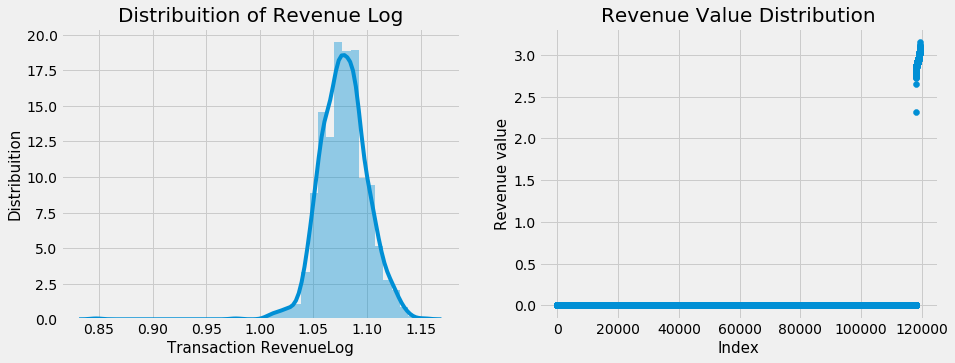

In [35]:
# Printing some statistics of our data
print("Transaction Revenue Min Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].min()) # printing the min value
print("Transaction Revenue Mean Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].mean()) # mean value
print("Transaction Revenue Median Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].median()) # median value
print("Transaction Revenue Max Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].max()) # the max value

# It I did to plot the quantiles but are not working
#print(round(df_train['totals.transactionRevenue'].quantile([.025,.25,.5,.75,.975]),2))

# seting the figure size of our plots
plt.figure(figsize=(14,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1
plt.subplot(1,2,1)
# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"] + 0.01), bins=40, kde=True)
ax.set_xlabel('Transaction RevenueLog', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20) #seting the title and size of font

# setting the second plot of our grid of graphs
plt.subplot(1,2,2)
# ordering the total of users and seting the values of transactions to understanding 
plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals.transactionRevenue'].values))
plt.xlabel('Index', fontsize=15) # xlabel and size of words
plt.ylabel('Revenue value', fontsize=15) # ylabel and size of words
plt.title("Revenue Value Distribution", fontsize=20) # Setting Title and fontsize

plt.show()

Calculate outliers

In [36]:
def CalcOutliers(df_num):
    data_mean, data_std = np.mean(df_num),np.std(df_num)
    cut = data_std * 3
    lower, upper = data_mean-cut, data_mean+cut
    
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    outliers_removed = [x for x in df_num if x > lower and x < upper]
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [37]:
CalcOutliers(df_train['totals.transactionRevenue']) # Call 

Identified lowest outliers: 0
Identified upper outliers: 1326
Identified outliers: 1326
Non-outlier observations: 118069
Total percentual of Outliers:  1.1231


In [38]:
CalcOutliers(df_train['totals.pageviews'])

Identified lowest outliers: 0
Identified upper outliers: 2335
Identified outliers: 2335
Non-outlier observations: 117060
Total percentual of Outliers:  1.9947


## Device Browsers 

Percent of Browser usage: 
Chrome               82200
Safari               21778
Firefox               4473
Internet Explorer     2448
Android Webview       2297
Edge                  1434
Samsung Internet      1055
Name: device.browser, dtype: int64


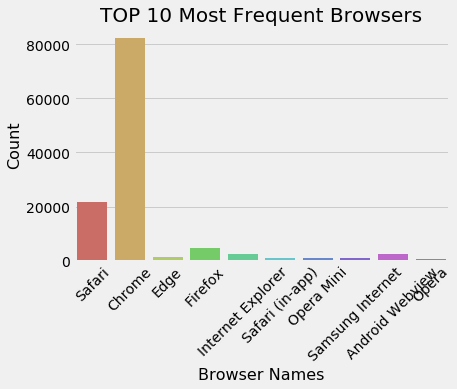

In [40]:
print("Percent of Browser usage: ")
print(df_train['device.browser'].value_counts()[:7])
# Let explore the browser used by users
sns.countplot(df_train[df_train['device.browser']\
                       .isin(df_train['device.browser']\
                             .value_counts()[:10].index.values)]['device.browser'], palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

Text(0,0.5,'Trans Revenue(log) Dist')

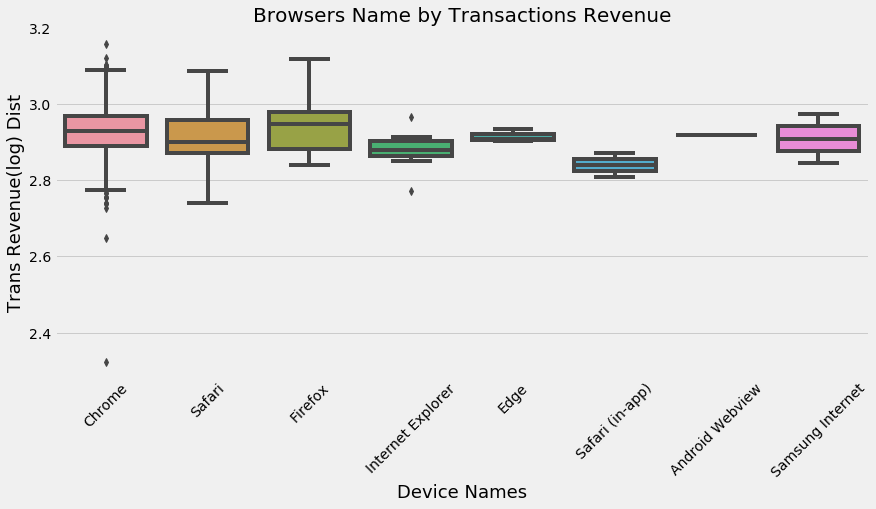

In [42]:
plt.figure(figsize=(13,6))
g1 = sns.boxplot(x='device.browser', y='totals.transactionRevenue', data = df_train[(df_train['device.browser'].isin((df_train['device.browser'].value_counts()[:10].index.values))) &
                                  df_train['totals.transactionRevenue'] > 0])
g1.set_title('Browsers Name by Transactions Revenue', fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Device Names', fontsize=18) # Xlabel
g1.set_ylabel('Trans Revenue(log) Dist', fontsize=18) #Ylabel

Channel Grouping

Percentual of Channel Grouping used: 
Organic Search    51846
Social            24586
Direct            19067
Referral          14773
Display            3599
Name: channelGrouping, dtype: int64


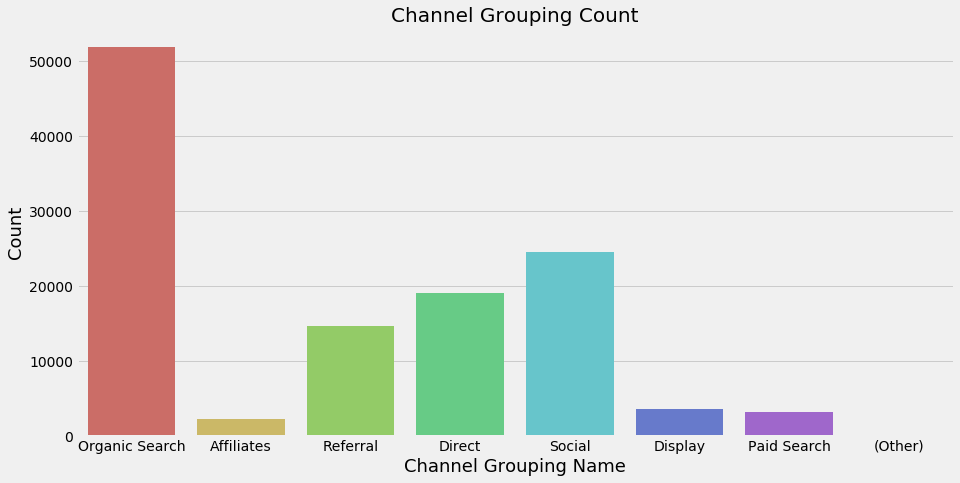

In [43]:
print("Percentual of Channel Grouping used: ")
print((df_train['channelGrouping'].value_counts()[:5])) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["channelGrouping"], palette="hls") # It's a module to count the category's
plt.title("Channel Grouping Count", fontsize=20) # seting the title size
plt.xlabel("Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size

plt.show() #use plt.show to render the graph that we did above

Channel grouping Vs Browsers

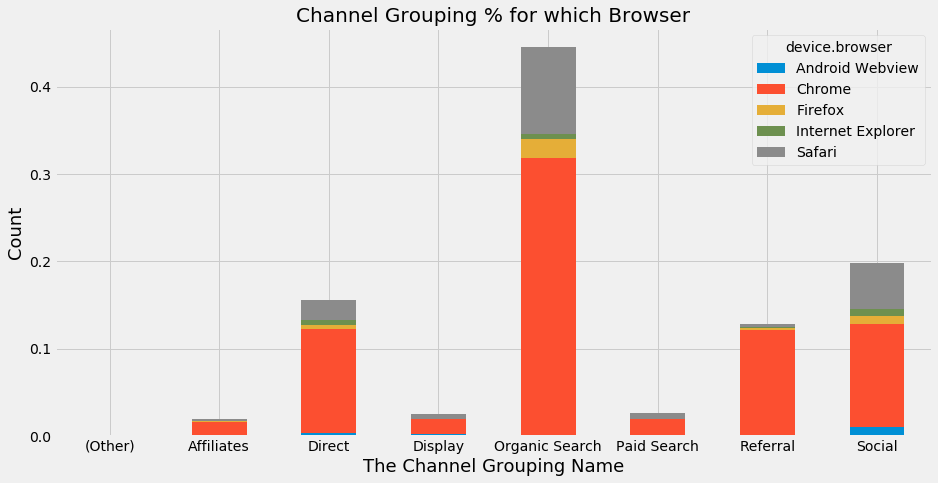

In [46]:
crosstab_eda = pd.crosstab(index=df_train['channelGrouping'],normalize=True,
                            columns=df_train[df_train['device.browser'].isin(df_train['device.browser'].value_counts()[:5].index.values)]['device.browser'])
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack
plt.title("Channel Grouping % for which Browser", fontsize=20) # seting the title size
plt.xlabel("The Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.show() # rendering

##### Operating System

Percentual of Operational System: 
Windows      43359
Macintosh    30871
Android      20898
iOS          15183
Linux         4417
Name: device.operatingSystem, dtype: int64


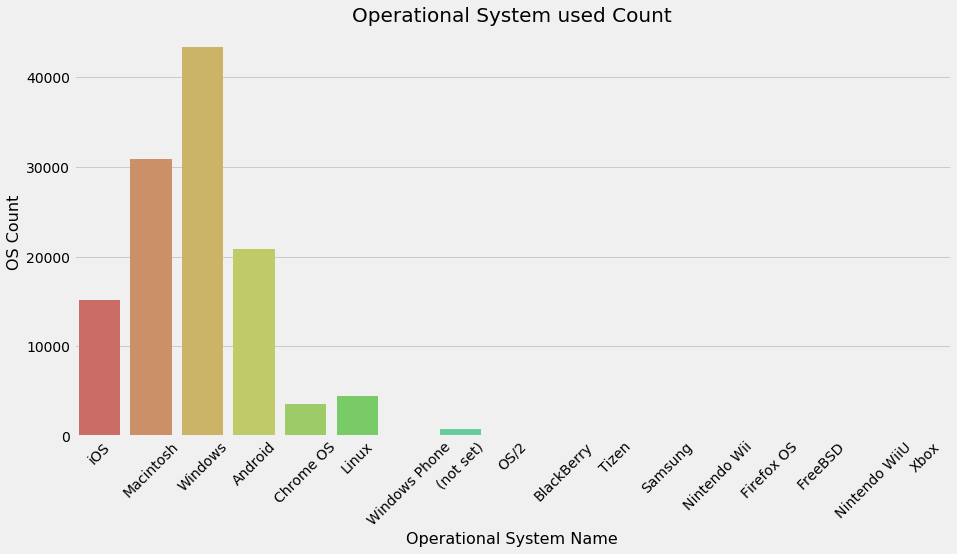

In [47]:
# the top 5 of browsers represent % of total
print("Percentual of Operational System: ")
print(df_train['device.operatingSystem'].value_counts()[:5]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["device.operatingSystem"], palette="hls") # It's a module to count the category's
plt.title("Operational System used Count", fontsize=20) # seting the title size
plt.xlabel("Operational System Name", fontsize=16) # seting the x label size
plt.ylabel("OS Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above